In [47]:
import pandas as pd
import numpy as np
df=pd.read_csv('nintendoSwitchBibliography.csv')
print(df)

                            Title         Genre     Developers  \
0           10 Second Run Returns    Platformer     Blue Print   
1                       12 orbits         Party    Roman Uhlig   
2                      1-2-Switch         Party   Nintendo EPD   
3        36 Fragments of Midnight    Platformer   Petite Games   
4    88 Heroes: 98 Heroes Edition    Platformer  Bitmap Bureau   
..                            ...           ...            ...   
265                      WWE 2K18        Sports         Yuke's   
266        Xenoblade Chronicles 2  Role-playing  Monolith Soft   
267                       Yōdanji  Role-playing          Kemco   
268    Ys VIII: Lacrimosa of Dana  Role-playing   Nihon Falcom   
269              Zombie Gold Rush       Shooter        Amazing   

                    Publisher Release date Ratings  
0                      G-Mode   12/21/2017     6.8  
1                 Roman Uhlig    4/27/2018     tbd  
2                    Nintendo     3/3/2017     4

In [49]:
df.shape

(270, 6)

In [51]:
df.head()

,Title,Genre,Developers,Publisher,Release date,Ratings
0,10 Second Run Returns,Platformer,Blue Print,G-Mode,12/21/2017,6.8
1,12 orbits,Party,Roman Uhlig,Roman Uhlig,4/27/2018,tbd
2,1-2-Switch,Party,Nintendo EPD,Nintendo,3/3/2017,4.8
3,36 Fragments of Midnight,Platformer,Petite Games,JP: Rainy Frog,9/27/2017,3.4
4,88 Heroes: 98 Heroes Edition,Platformer,Bitmap Bureau,Rising Star Games,10/12/2017,6.8


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         270 non-null    object
 1   Genre         270 non-null    object
 2   Developers    270 non-null    object
 3   Publisher     270 non-null    object
 4   Release date  270 non-null    object
 5   Ratings       269 non-null    object
dtypes: object(6)
memory usage: 12.8+ KB


In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

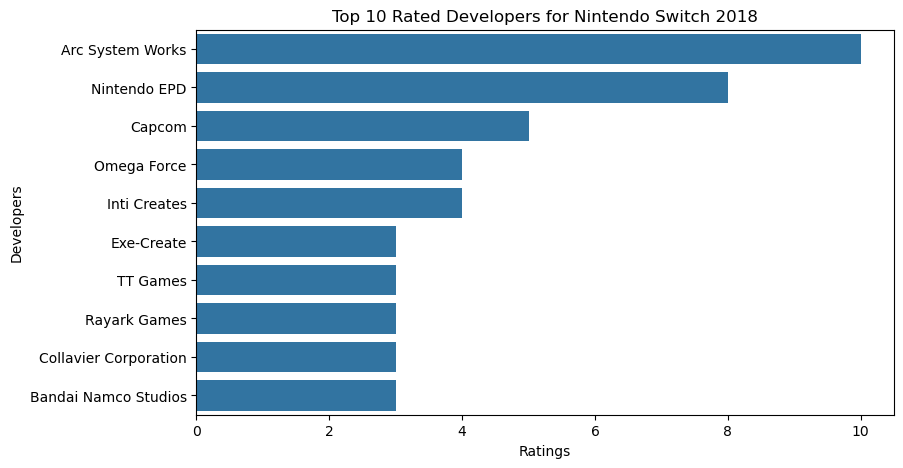

In [61]:
developers_order = df['Developers'].value_counts().head(10).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='Developers', order=developers_order)
plt.title('Top 10 Rated Developers for Nintendo Switch 2018')
plt.xlabel('Ratings')
plt.ylabel('Developers');

Text(0, 0.5, 'Ratings')

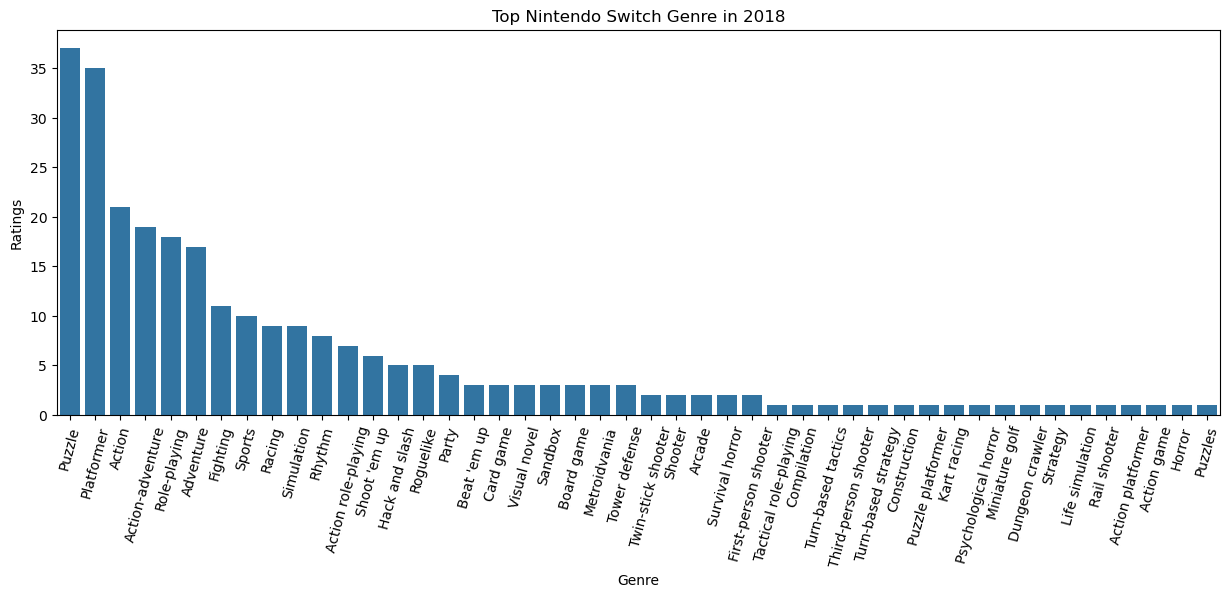

In [97]:
plt.figure(figsize=(15, 5))
highest_genre = df['Genre'].value_counts().index
sns.countplot(data=df, x='Genre', order=highest_genre)
plt.xticks(rotation=75)
plt.title('Top Nintendo Switch Genre in 2018')
plt.xlabel('Genre')
plt.ylabel('Ratings')

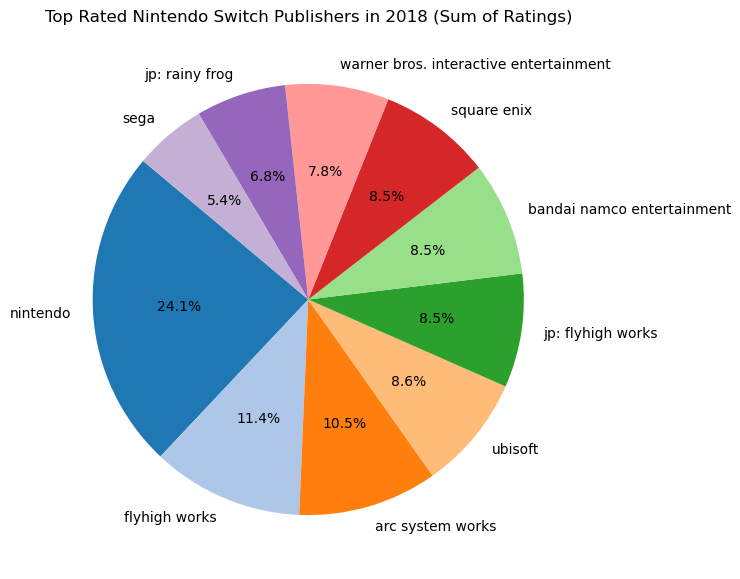

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'nintendoSwitchBibliography.csv'  # Update with the actual file path
data = pd.read_csv(file_path)

# Step 2: Normalize Publisher names
data['Publisher'] = data['Publisher'].str.lower().str.strip()

# Step 3: Convert Ratings to numeric and drop invalid entries
data['Ratings'] = pd.to_numeric(data['Ratings'], errors='coerce')
data_cleaned = data.dropna(subset=['Ratings'])

# Step 4: Group by Publisher and sum their ratings
publisher_ratings = data_cleaned.groupby('Publisher')['Ratings'].sum().sort_values(ascending=False)

# Step 5: Select Top 10 Publishers
top_publishers = publisher_ratings.head(10)

# Step 6: Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    top_publishers, 
    labels=top_publishers.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.tab20.colors
)
plt.title('Top Rated Nintendo Switch Publishers in 2018 (Sum of Ratings)')
plt.show()

